## Importing lib

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from zipfile import ZipFile
import requests
import io


## Loading dataset

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download and extract the ZIP file
response = requests.get(url)
zipfile = ZipFile(io.BytesIO(response.content))
# Extract the specific file needed
with zipfile.open('SMSSpamCollection') as file:
    df = pd.read_csv(file, sep='\t', names=['label', 'message'])

In [9]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   label    0 non-null      float64
 1   message  5572 non-null   object 
 2   length   5572 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 130.7+ KB


In [63]:
df.head()

,label,message,length
0,NaN,"Go until jurong point, crazy.. Available only ...",111
1,NaN,Ok lar... Joking wif u oni...,29
2,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,NaN,U dun say so early hor... U c already then say...,49
4,NaN,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # data_preprocessing 
df['length'] = df['message'].apply(len)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


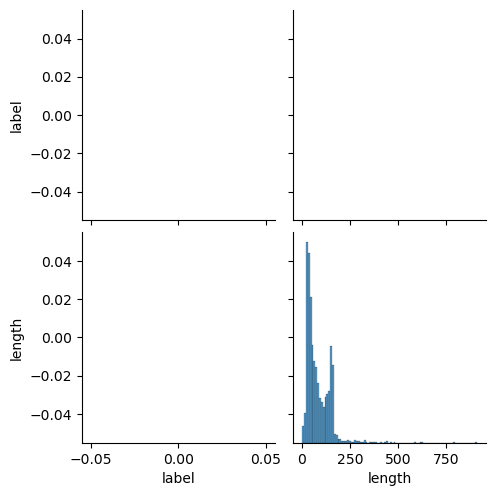

In [45]:
sns.pairplot(df)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=101)

## use of TF-IDF 

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Naive Bayes Classifier

In [13]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)

In [14]:
y_pred_nb 

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1475
           1       1.00      0.73      0.84       197

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.97      0.97      1672

Confusion Matrix:
 [[1475    0]
 [  53  144]]


In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Accuracy: 0.9683014354066986


## Logistic Regression 

In [18]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1475
           1       0.97      0.64      0.77       197

    accuracy                           0.96      1672
   macro avg       0.96      0.82      0.87      1672
weighted avg       0.96      0.96      0.95      1672

Confusion Matrix:
 [[1471    4]
 [  71  126]]


In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9551435406698564


## SVM CLASSIFICATION

In [21]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)

In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1475
           1       0.96      0.89      0.92       197

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix:
 [[1467    8]
 [  22  175]]


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.9820574162679426


In [52]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

## result visualizations 

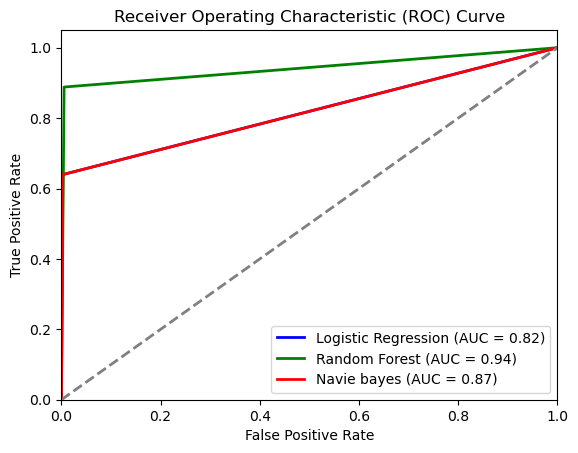

In [58]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


fpr_svm, tpr_svm, _ = roc_curve(y_test,y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_nb, tpr_nb, _ = roc_curve(y_test,y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Navie bayes (AUC = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

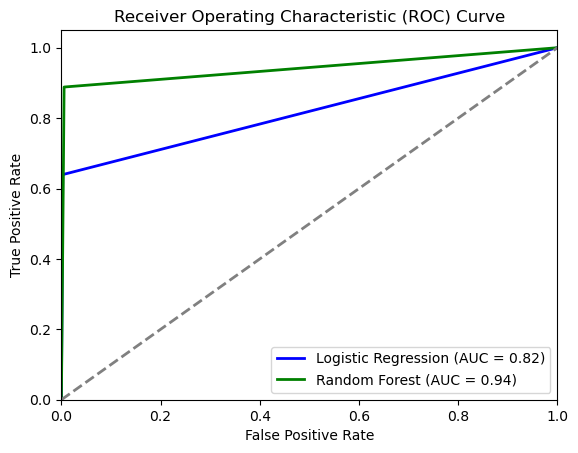

In [57]:
fpr_lr, tpr_lr, _ = roc_curve(y_test,y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


fpr_svm, tpr_svm, _ = roc_curve(y_test,y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

#fpr_nb, tpr_nb, _ = roc_curve(y_test,y_pred_nb)
#roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_svm)
#plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Navie bayes (AUC = %0.2f)' % roc_auc_nb)

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

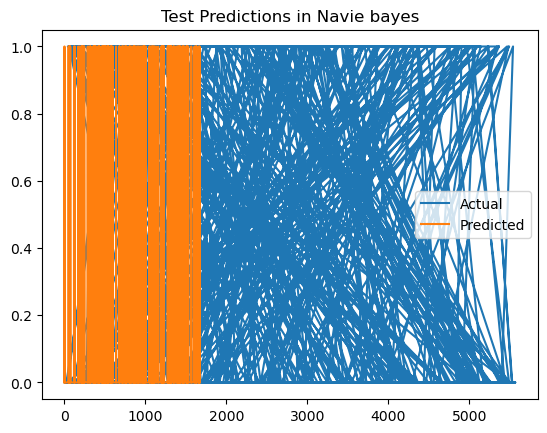

In [59]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred_nb , label='Predicted')
plt.title('Test Predictions in Navie bayes')
plt.legend()
plt.show()

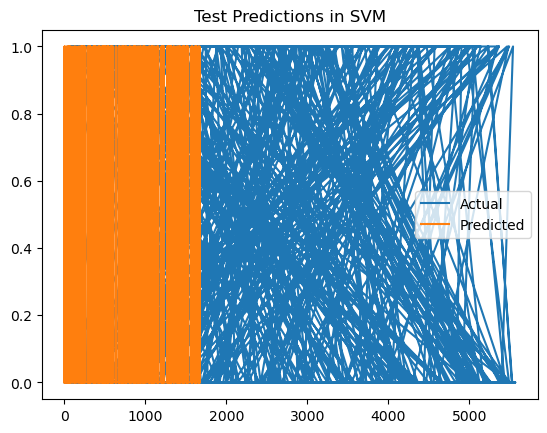

In [60]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred_svm , label='Predicted')
plt.title('Test Predictions in SVM')
plt.legend()
plt.show()

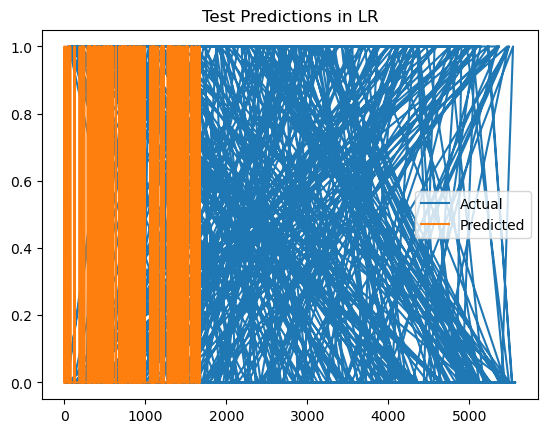

In [61]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lr , label='Predicted')
plt.title('Test Predictions in LR')
plt.legend()
plt.show()